Overview of the Problem Statement

Dataset
First lets look at the dataset. It is Position_Salaries.csv and can be found here
It has 3 columns - "Position", "Level" and "Salary" and describes the approximate salary range for an employee based on what level he falls under.

For example if an employee is a Manager - he falls in Level 4 and should get around $80,000.

Project Objective
Lets assume the above table is what the HR team of a company uses to determine what salary to offer to a new employee. 
For our project, let's take an example that an employee has applied for the role of a Regional Manager and has already worked as a Regional Manager for 2 years. 
So based on the table above - he falls between level 6 and level 7 - Lets say he falls under level 6.5
We want to build a model to predict what salary we should offer this new employee.


1. Use Linear Model and Visualise the Plot 
2. Use Polynomial Regression and Visualise the Plot Properly.
3. Use Proper Diagonistics to show the accuracy and error of the Model
4. Perform the task both in Excel and Python
5. Create a Proper Presentation regarding the Use Case.
6. Share the html of the Python Note book only.


Importing the dataset

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
path='C:/Users/devar/Desktop/data set1'

In [3]:
os.chdir(path)

In [4]:
os.listdir()

['cast.csv',
 'Copy of Countif Exercise - 1.xlsx',
 'CORELATION ANALYSIS.csv',
 'Iphone Purchase data.csv',
 'salary and position.csv',
 'SATISTICS.xlsx']

In [5]:
data=pd.read_csv('salary and position.csv')
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


 Data Preprocessing

In [6]:
data.shape

(10, 3)

In [7]:
# Lets taking X and y values 
X=data['Level'].values
y=data['Salary'].values

In [8]:
X=X.reshape(-1,1)
X
type(X)

numpy.ndarray

In [9]:
y=y.reshape(-1,1)
y
type(y)

numpy.ndarray

Fitting a Linear Regression Model

In [10]:
#Using Linear model and Visualise the Plot.. 
from sklearn.linear_model import LinearRegression

In [11]:
lin=LinearRegression()

In [12]:
lin.fit(X,y)

LinearRegression()

Visualizing results of the linear regression model

Text(0, 0.5, 'Salary')

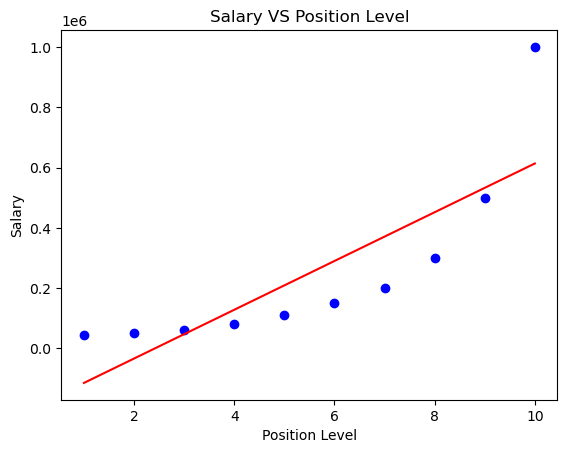

In [13]:
plt.scatter(X,y,color='blue')
plt.plot(X,lin.predict(X),color='red')
plt.title("Salary VS Position Level")
plt.xlabel('Position Level')
plt.ylabel('Salary')

In [14]:
## Coefficient(m) and intercept(C) values for linear Model

In [15]:
lin.coef_

array([[80878.78787879]])

In [16]:
lin.intercept_

array([-195333.33333333])

In [47]:
### Diagonistics to check accuracy of the model and error in the model.
pred = lin.predict(X)
pred

array([[-114454.54545455],
       [ -33575.75757576],
       [  47303.03030303],
       [ 128181.81818182],
       [ 209060.60606061],
       [ 289939.39393939],
       [ 370818.18181818],
       [ 451696.96969697],
       [ 532575.75757576],
       [ 613454.54545455]])

In [48]:
##### Mean Squared Error (mse) #y is actual val and pred id predicted value (act-pred)^2, total it and mean 
mean_squared_error(y,pred) #pred is predicted using linear reg model. 
##error is way too high for linear reg model . hence polynomial regression model should give best result. 

26695878787.878784

In [49]:
sqrt(mean_squared_error(y,pred))

163388.73519272613

In [17]:
## Strength of the model

In [50]:
lin.score(X,y)

0.6690412331929895

Fitting a Polynomial Regression Model

In [51]:
## using polynomial regression and visualise the plot. 
from sklearn.preprocessing import PolynomialFeatures

In [52]:
Poly=PolynomialFeatures(degree=4)

In [53]:
Poly_x=Poly.fit_transform(X)
Poly_x

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [54]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [55]:
Poly.fit(Poly_x,y)

PolynomialFeatures(degree=4)

In [56]:
lin2=LinearRegression()
lin2.fit(Poly_x,y)

LinearRegression()

Visualizing the Polynomial Regression model

Text(0, 0.5, 'Salary')

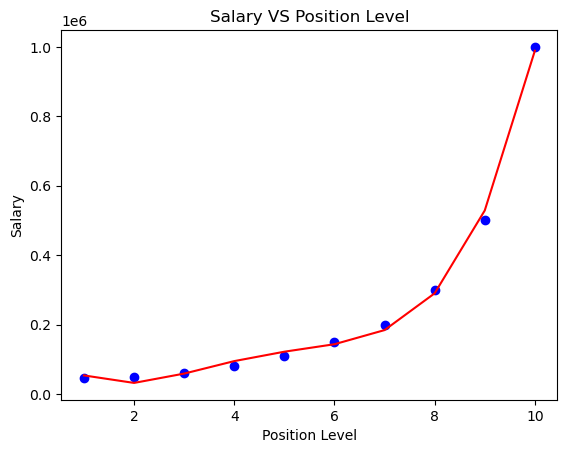

In [57]:
plt.scatter(X,y,color='blue')
plt.plot(X,lin2.predict(Poly.fit_transform(X)),color='red')
plt.title("Salary VS Position Level")
plt.xlabel('Position Level')
plt.ylabel('Salary')

Predicted Salary

In [58]:
pred_Salary=lin2.predict(Poly.fit_transform(X))

In [59]:
pred_Salary

array([[ 53356.64335683],
       [ 31759.90675992],
       [ 58642.19114218],
       [ 94632.86713289],
       [121724.941725  ],
       [143275.05827513],
       [184003.49650353],
       [289994.17249412],
       [528694.6386945 ],
       [988916.0839159 ]])

In [60]:
data['Pred_Salary']=pred_Salary
data

,Position,Level,Salary,Pred_Salary
0,Business Analyst,1,45000,53356.643357
1,Junior Consultant,2,50000,31759.906760
2,Senior Consultant,3,60000,58642.191142
3,Manager,4,80000,94632.867133
4,Country Manager,5,110000,121724.941725
5,Region Manager,6,150000,143275.058275
6,Partner,7,200000,184003.496504
7,Senior Partner,8,300000,289994.172494
8,C-level,9,500000,528694.638694
9,CEO,10,1000000,988916.083916


Error in Model:

In [61]:
## To find error in model
mean_squared_error(y,pred_Salary)

210343822.8438203

In [62]:
sqrt(mean_squared_error(y,pred_Salary))

14503.234909626897

Predicted Salary

In [63]:
data['Pred_Salary']=pred_Salary
data

,Position,Level,Salary,Pred_Salary
0,Business Analyst,1,45000,53356.643357
1,Junior Consultant,2,50000,31759.906760
2,Senior Consultant,3,60000,58642.191142
3,Manager,4,80000,94632.867133
4,Country Manager,5,110000,121724.941725
5,Region Manager,6,150000,143275.058275
6,Partner,7,200000,184003.496504
7,Senior Partner,8,300000,289994.172494
8,C-level,9,500000,528694.638694
9,CEO,10,1000000,988916.083916


In [64]:
## Coefficients(m1,m2,m3) and intercept(C) values for Polynomial model 

In [65]:
lin2.fit(Poly_x,y).coef_


array([[      0.        , -211002.33100292,   94765.44289063,
         -15463.28671331,     890.15151515]])

In [66]:
lin2.fit(Poly_x,y).intercept_

array([184166.66666727])

In [67]:
## R square value or Strength of the model

In [68]:
lin2.score(Poly.fit_transform(X),y)     ## Here R square value is more towards to one.So strength of model is too strong

0.9973922891706614

 Predicting the Result

In [69]:
## Now let's find the  New Employee Salary of level(X) 6.5 years using both linear and Polynomial model

In [70]:
lin.predict([[6.5]])

array([[330378.78787879]])

In [71]:
# Predicting a new result with Polymonial Regression
lin2.predict(Poly.fit_transform([[6.5]]))

array([[158862.45265157]])